# EDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('loan_default.csv')

# Basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nData Info:")
print(df.info())

Dataset Shape: (255347, 18)

First few rows:
       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes     

Default Distribution:
Default
0    88.387175
1    11.612825
Name: proportion, dtype: float64

Numerical Variables Summary:
                 Age         Income     LoanAmount    CreditScore  \
count  255347.000000  255347.000000  255347.000000  255347.000000   
mean       43.498306   82499.304597  127578.865512     574.264346   
std        14.990258   38963.013729   70840.706142     158.903867   
min        18.000000   15000.000000    5000.000000     300.000000   
25%        31.000000   48825.500000   66156.000000     437.000000   
50%        43.000000   82466.000000  127556.000000     574.000000   
75%        56.000000  116219.000000  188985.000000     712.000000   
max        69.000000  149999.000000  249999.000000     849.000000   

       MonthsEmployed  NumCreditLines   InterestRate       LoanTerm  \
count   255347.000000   255347.000000  255347.000000  255347.000000   
mean        59.541976        2.501036      13.492773      36.025894   
std         34.643376        1.117018     

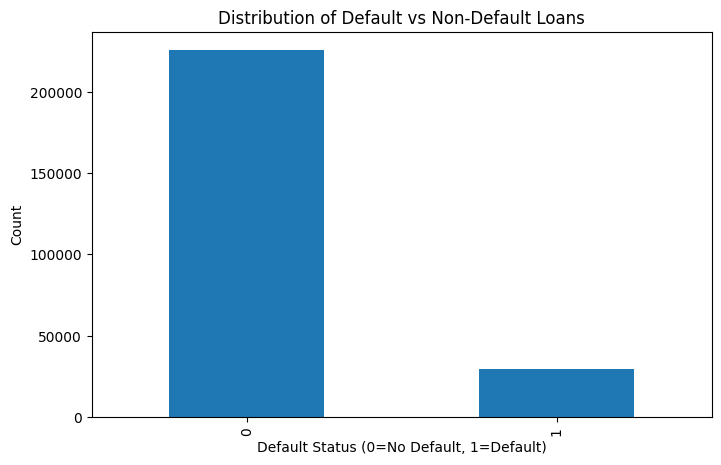

In [4]:
# 1. Check default distribution
print("Default Distribution:")
print(df['Default'].value_counts(normalize=True) * 100)

# 2. Basic statistics for numerical variables
numerical_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 
                 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

print("\nNumerical Variables Summary:")
print(df[numerical_cols].describe())

# 3. Visualize default distribution
plt.figure(figsize=(8, 5))
df['Default'].value_counts().plot(kind='bar')
plt.title('Distribution of Default vs Non-Default Loans')
plt.xlabel('Default Status (0=No Default, 1=Default)')
plt.ylabel('Count')
plt.show()

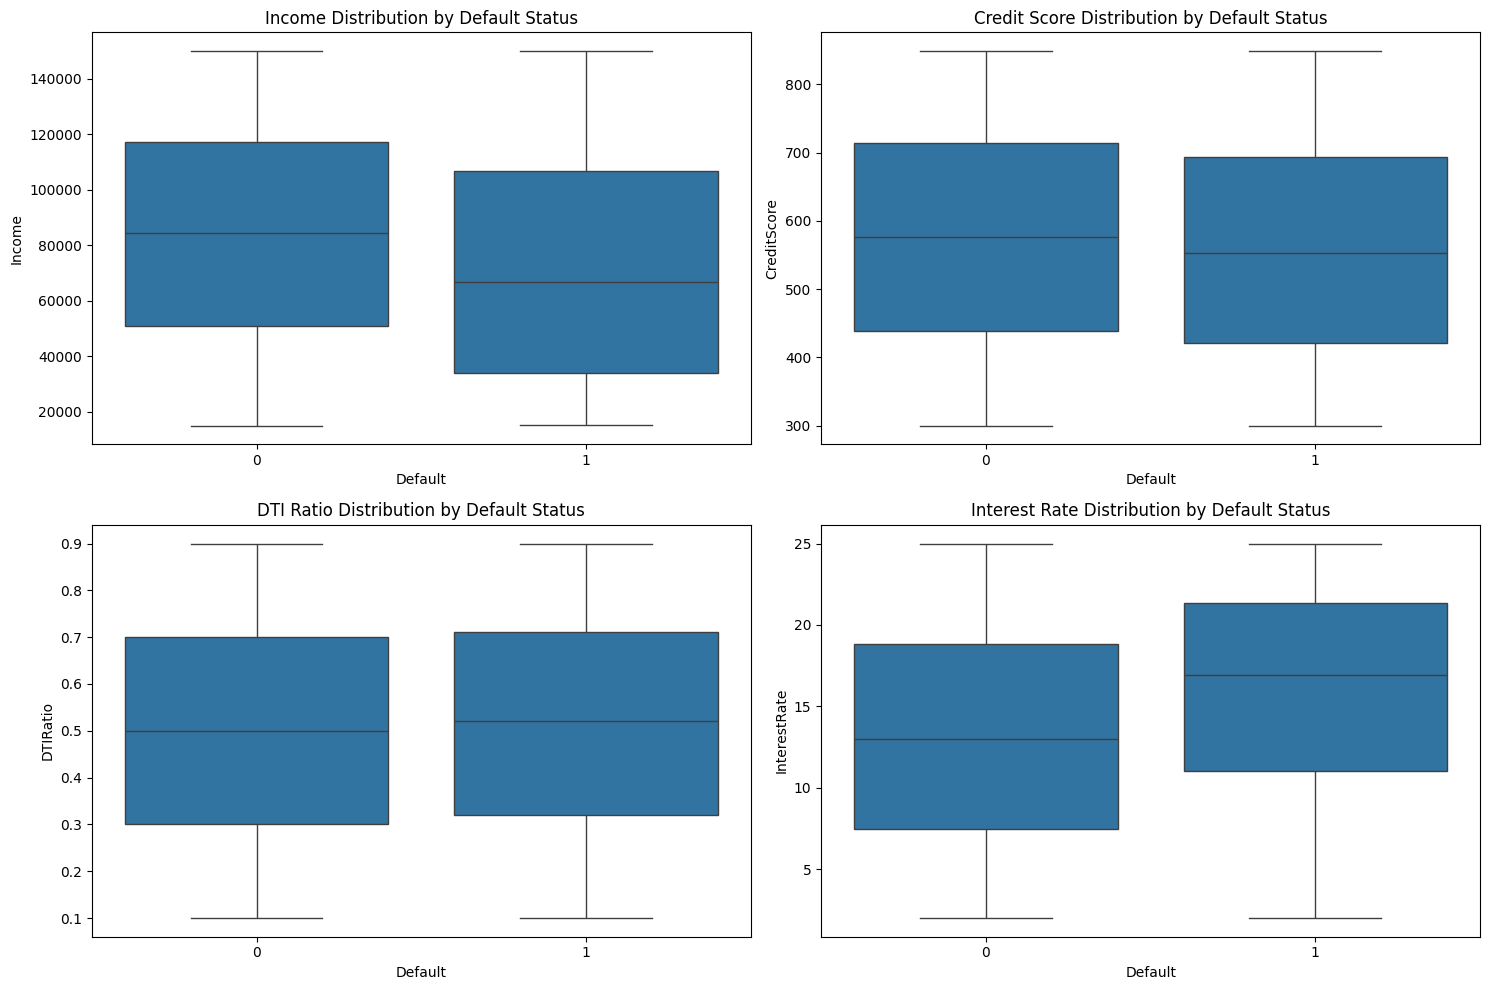


Mean values by default status:
               Income  CreditScore  DTIRatio  InterestRate
Default                                                   
0        83899.165995   576.232270  0.498602     13.176994
1        71844.722659   559.286143  0.512467     15.896227


In [5]:
# Create box plots for key numerical variables
plt.figure(figsize=(15, 10))

# Create subplots for key financial indicators
plt.subplot(2, 2, 1)
sns.boxplot(x='Default', y='Income', data=df)
plt.title('Income Distribution by Default Status')

plt.subplot(2, 2, 2)
sns.boxplot(x='Default', y='CreditScore', data=df)
plt.title('Credit Score Distribution by Default Status')

plt.subplot(2, 2, 3)
sns.boxplot(x='Default', y='DTIRatio', data=df)
plt.title('DTI Ratio Distribution by Default Status')

plt.subplot(2, 2, 4)
sns.boxplot(x='Default', y='InterestRate', data=df)
plt.title('Interest Rate Distribution by Default Status')

plt.tight_layout()
plt.show()

# Calculate mean values for each group
print("\nMean values by default status:")
print(df.groupby('Default')[['Income', 'CreditScore', 'DTIRatio', 'InterestRate']].mean())

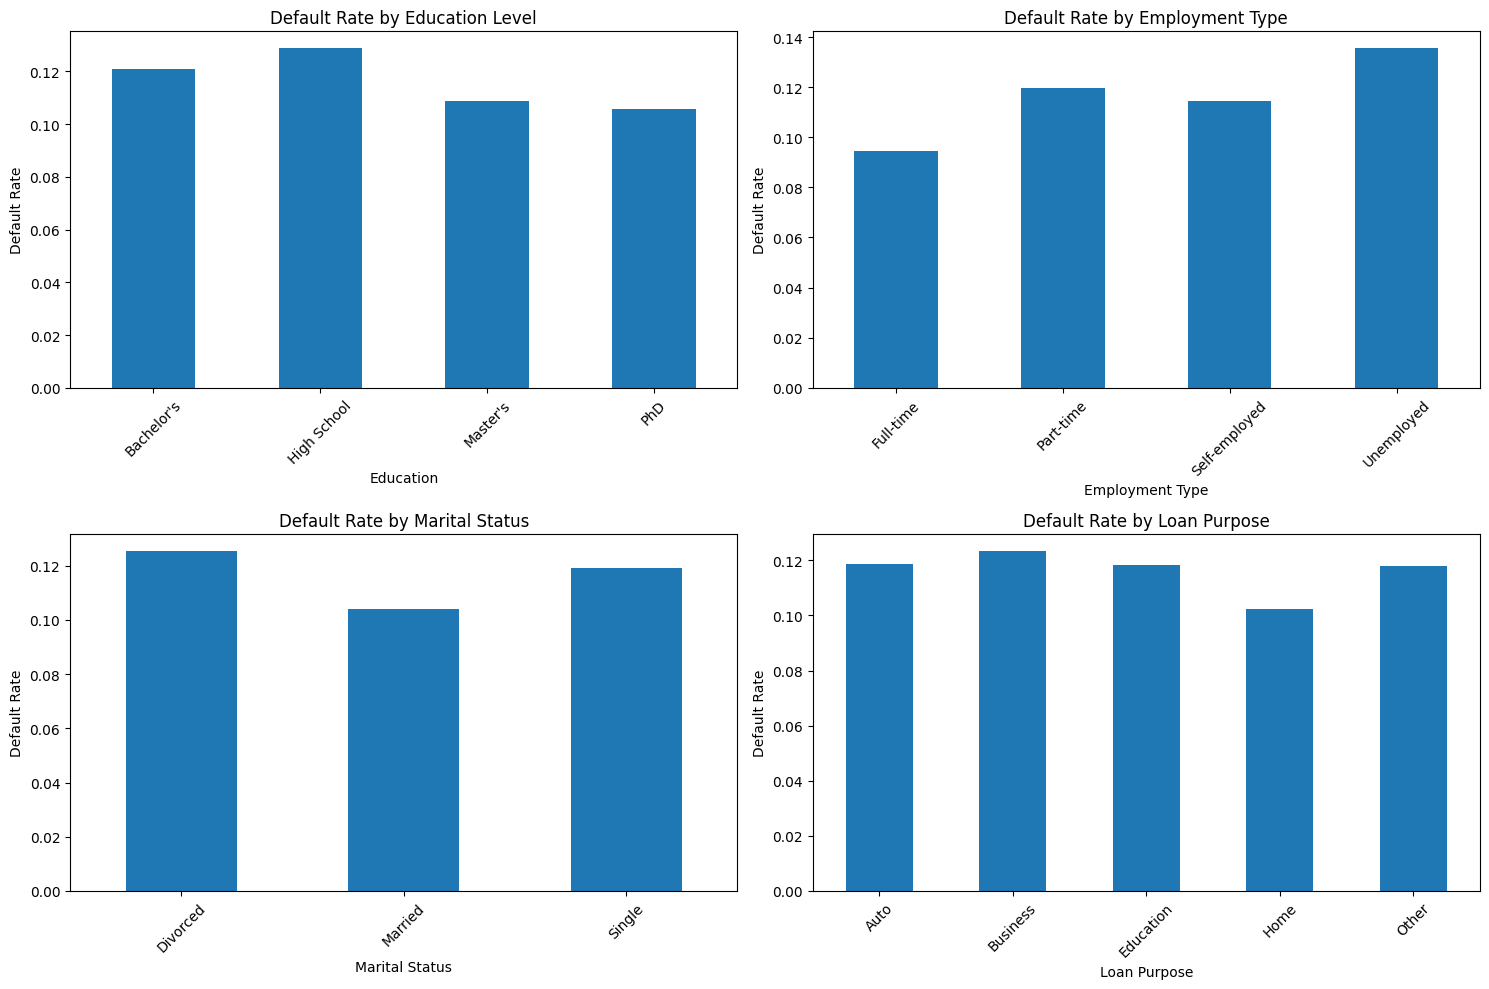


Default Rates by Category:

Education Default Rates:
Education
High School    0.128789
Bachelor's     0.121011
Master's       0.108717
PhD            0.105860
Name: Default, dtype: float64

EmploymentType Default Rates:
EmploymentType
Unemployed       0.135529
Part-time        0.119652
Self-employed    0.114620
Full-time        0.094634
Name: Default, dtype: float64

MaritalStatus Default Rates:
MaritalStatus
Divorced    0.125328
Single      0.119124
Married     0.103972
Name: Default, dtype: float64

LoanPurpose Default Rates:
LoanPurpose
Business     0.123260
Auto         0.118814
Education    0.118381
Other        0.117885
Home         0.102348
Name: Default, dtype: float64


In [6]:
# Set up the figure size for all plots
plt.figure(figsize=(15, 10))

# 1. Education and Default Rate
plt.subplot(2, 2, 1)
df.groupby('Education')['Default'].mean().plot(kind='bar')
plt.title('Default Rate by Education Level')
plt.xlabel('Education')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)

# 2. Employment Type and Default Rate
plt.subplot(2, 2, 2)
df.groupby('EmploymentType')['Default'].mean().plot(kind='bar')
plt.title('Default Rate by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)

# 3. Marital Status and Default Rate
plt.subplot(2, 2, 3)
df.groupby('MaritalStatus')['Default'].mean().plot(kind='bar')
plt.title('Default Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)

# 4. Loan Purpose and Default Rate
plt.subplot(2, 2, 4)
df.groupby('LoanPurpose')['Default'].mean().plot(kind='bar')
plt.title('Default Rate by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print the actual percentages
print("\nDefault Rates by Category:")
for category in ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']:
    print(f"\n{category} Default Rates:")
    print(df.groupby(category)['Default'].mean().sort_values(ascending=False))

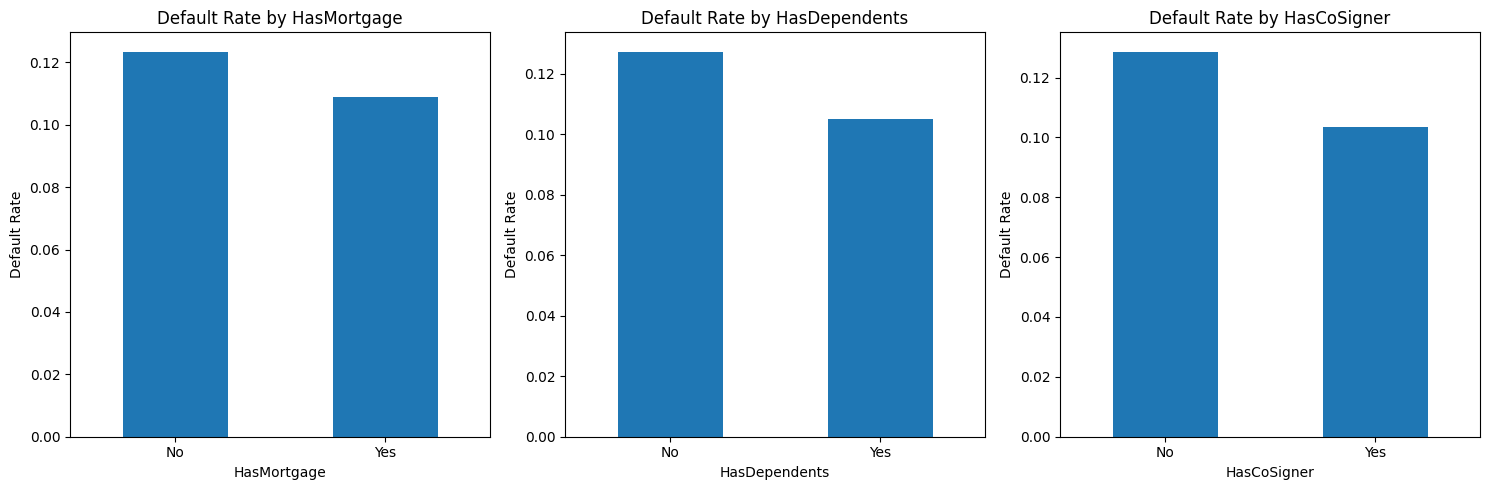


Default Rates for Binary Features:

HasMortgage Default Rates:
HasMortgage
No     0.123451
Yes    0.108806
Name: Default, dtype: float64

HasDependents Default Rates:
HasDependents
No     0.127244
Yes    0.105024
Name: Default, dtype: float64

HasCoSigner Default Rates:
HasCoSigner
No     0.128661
Yes    0.103601
Name: Default, dtype: float64


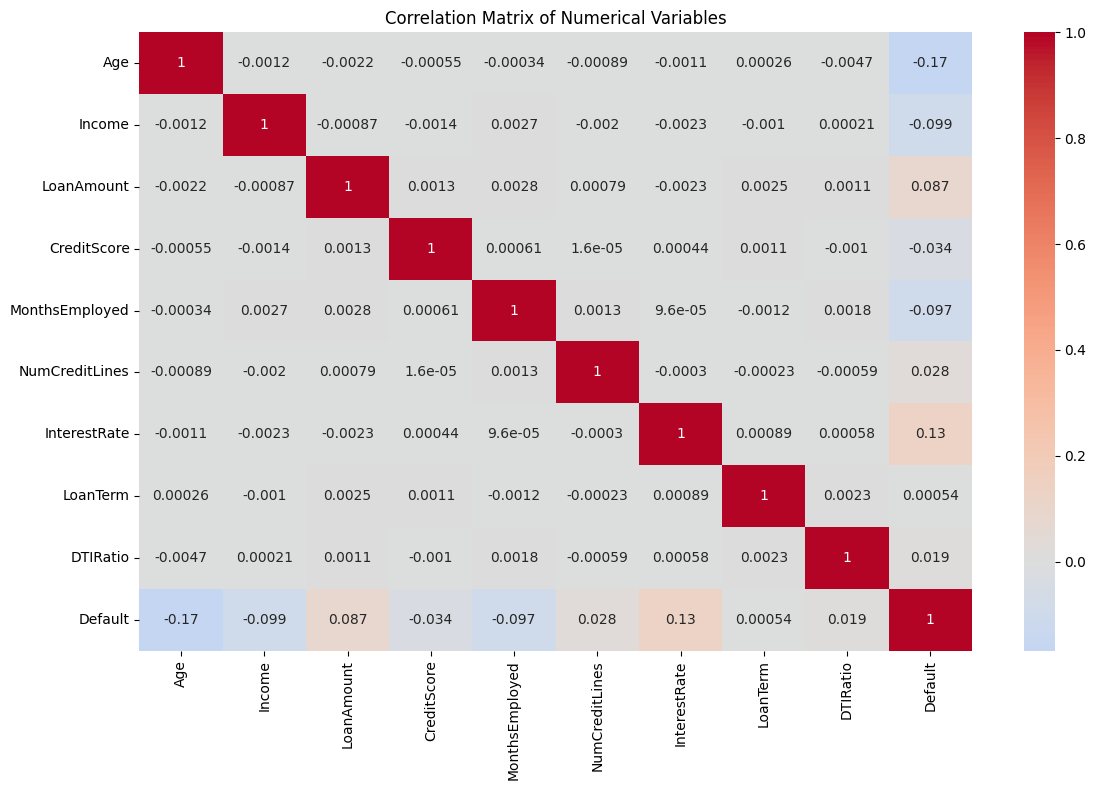

In [7]:
# Set up the figure size for binary features analysis
plt.figure(figsize=(15, 5))

# Analyze binary features
binary_features = ['HasMortgage', 'HasDependents', 'HasCoSigner']

# Create subplots for binary features
for i, feature in enumerate(binary_features, 1):
    plt.subplot(1, 3, i)
    df.groupby(feature)['Default'].mean().plot(kind='bar')
    plt.title(f'Default Rate by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Default Rate')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Print the actual percentages for binary features
print("\nDefault Rates for Binary Features:")
for feature in binary_features:
    print(f"\n{feature} Default Rates:")
    print(df.groupby(feature)['Default'].mean().sort_values(ascending=False))

# Create correlation matrix for numerical variables
numerical_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 
                 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default']

plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

# Feature Engineering & Preprocessing

In [28]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# 1. Feature Engineering
def engineer_features(df):
    # Create copy to avoid modifying original data
    df_new = df.copy()
    
    # Create new features
    df_new['Debt_to_Income'] = df_new['LoanAmount'] / df_new['Income']
    df_new['Monthly_Payment'] = (df_new['LoanAmount'] * (df_new['InterestRate']/1200)) / (1 - (1 + df_new['InterestRate']/1200)**(-df_new['LoanTerm']))
    df_new['Payment_to_Income'] = df_new['Monthly_Payment'] / (df_new['Income']/12)
    
    # Instead of creating categorical Credit_Risk, let's create numerical risk scores
    df_new['Credit_Risk_Score'] = pd.cut(df_new['CreditScore'], 
                                        bins=[0, 580, 670, 740, 800, 850], 
                                        labels=[1, 2, 3, 4, 5]).astype(int)
    
    return df_new


In [29]:
# 2. Preprocessing
def preprocess_data(df):
    # Create copy to avoid modifying original data
    df = df.copy()
    
    # Drop the LoanID column if it exists
    if 'LoanID' in df.columns:
        df = df.drop('LoanID', axis=1)
    
    # Convert binary features
    binary_cols = ['HasMortgage', 'HasDependents', 'HasCoSigner']
    for col in binary_cols:
        df[col] = df[col].map({'Yes': 1, 'No': 0})
    
    # Convert categorical features using Label Encoding
    cat_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']
    le = LabelEncoder()
    for col in cat_cols:
        df[col] = le.fit_transform(df[col])
    
    # Scale numerical features
    scaler = StandardScaler()
    num_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 
                'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio',
                'Debt_to_Income', 'Monthly_Payment', 'Payment_to_Income',
                'Credit_Risk_Score']
    
    df[num_cols] = scaler.fit_transform(df[num_cols])
    
    return df, scaler

In [30]:
# 3. Split Data
def split_data(df, target_col='Default'):
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    
    # Split with stratification to handle any class imbalance
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.2, 
                                                        random_state=42, 
                                                        stratify=y)
    return X_train, X_test, y_train, y_test

In [31]:
# 4. Main preprocessing pipeline
def main_preprocessing():
    # Load data
    df = pd.read_csv('loan_default.csv')
    
    # Engineer features
    df_engineered = engineer_features(df)
    
    # Preprocess data
    df_processed, scaler = preprocess_data(df_engineered)
    
    # Split data
    X_train, X_test, y_train, y_test = split_data(df_processed)
    
    # Print shapes to verify
    print("Training set shape:", X_train.shape)
    print("Testing set shape:", X_test.shape)
    print("\nFeature names:", X_train.columns.tolist())
    
    return X_train, X_test, y_train, y_test, scaler

In [20]:
# Main preprocessing pipeline
def main_preprocessing():
    # Load data
    df = pd.read_csv('loan_default.csv')
    
    # Engineer features
    df_engineered = engineer_features(df)
    
    # Preprocess data
    df_processed, scaler = preprocess_data(df_engineered)
    
    # Split data
    X_train, X_test, y_train, y_test = split_data(df_processed)
    
    # Print shapes to verify
    print("Training set shape:", X_train.shape)
    print("Testing set shape:", X_test.shape)
    print("\nFeature names:", X_train.columns.tolist())
    
    return X_train, X_test, y_train, y_test, scaler

In [32]:
# Run the preprocessing pipeline
X_train, X_test, y_train, y_test, scaler = main_preprocessing()

Training set shape: (204277, 20)
Testing set shape: (51070, 20)

Feature names: ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner', 'Debt_to_Income', 'Monthly_Payment', 'Payment_to_Income', 'Credit_Risk_Score']


# Model Development

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

def train_and_evaluate_models():
    # Initialize models
    models = {
        'Logistic Regression': LogisticRegression(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42)
    }
    
    # Dictionary to store results
    results = {}
        # Train and evaluate each model
    for name, model in models.items():
        print(f"\nTraining {name}...")
        
        # Train model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        
        # Calculate metrics
        results[name] = {
            'classification_report': classification_report(y_test, y_pred),
            'confusion_matrix': confusion_matrix(y_test, y_pred),
            'roc_auc': roc_auc_score(y_test, y_pred_proba),
            'model': model
        }
        
        # Print results
        print(f"\n{name} Results:")
        print("ROC AUC Score:", results[name]['roc_auc'])
        print("\nClassification Report:")
        print(results[name]['classification_report'])
        
        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(results[name]['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {name}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()
    
    return results


Training Logistic Regression...

Logistic Regression Results:
ROC AUC Score: 0.7584306037370642

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     45139
           1       0.61      0.07      0.12      5931

    accuracy                           0.89     51070
   macro avg       0.75      0.53      0.53     51070
weighted avg       0.86      0.89      0.84     51070



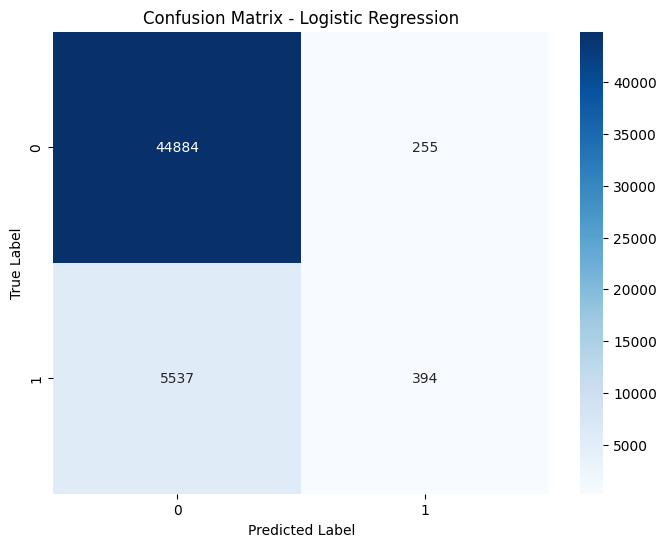


Training Random Forest...

Random Forest Results:
ROC AUC Score: 0.7348259516739034

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.60      0.05      0.09      5931

    accuracy                           0.89     51070
   macro avg       0.75      0.52      0.52     51070
weighted avg       0.86      0.89      0.84     51070



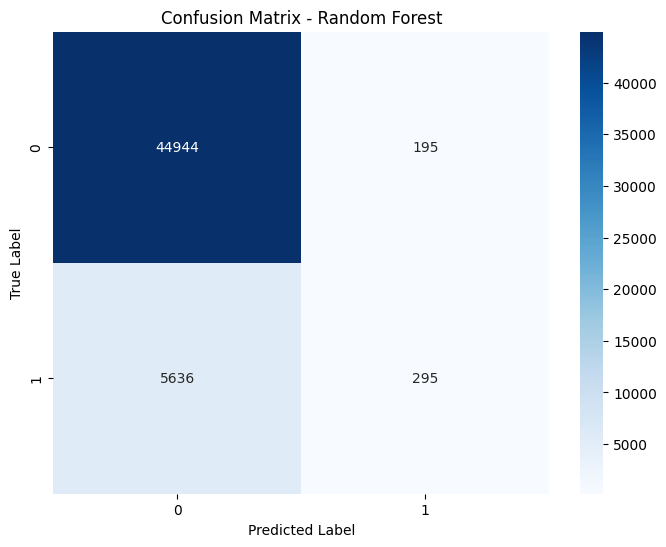


Training Gradient Boosting...

Gradient Boosting Results:
ROC AUC Score: 0.7586701381071703

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     45139
           1       0.61      0.06      0.11      5931

    accuracy                           0.89     51070
   macro avg       0.75      0.53      0.52     51070
weighted avg       0.86      0.89      0.84     51070



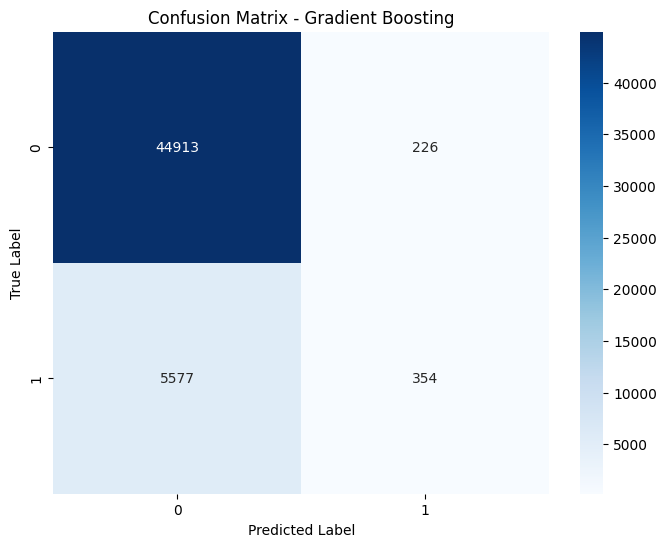


Best performing model: Gradient Boosting


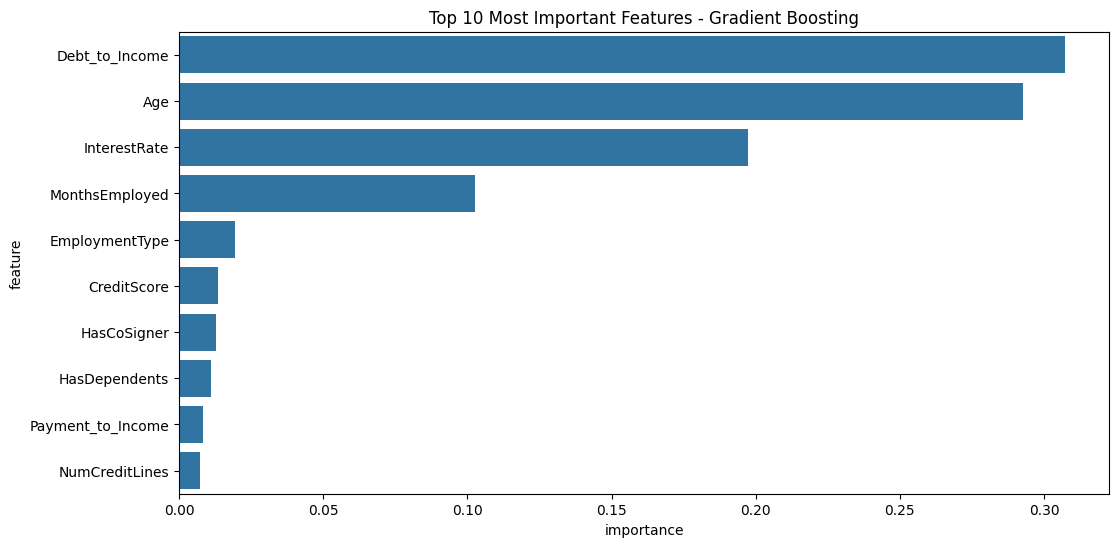


Top 10 Most Important Features:
              feature  importance
16     Debt_to_Income    0.307192
0                 Age    0.292691
6        InterestRate    0.197168
4      MonthsEmployed    0.102626
10     EmploymentType    0.019347
3         CreditScore    0.013690
15        HasCoSigner    0.012736
13      HasDependents    0.011230
18  Payment_to_Income    0.008438
5      NumCreditLines    0.007274


In [34]:
# Train and evaluate models
model_results = train_and_evaluate_models()

# Find best performing model
best_model_name = max(model_results.items(), 
                     key=lambda x: x[1]['roc_auc'])[0]

print(f"\nBest performing model: {best_model_name}")

# Feature importance for best model (if Random Forest or Gradient Boosting)
best_model = model_results[best_model_name]['model']
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(12, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
    plt.title(f'Top 10 Most Important Features - {best_model_name}')
    plt.show()
    
    print("\nTop 10 Most Important Features:")
    print(feature_importance.head(10))

# Risk Assessment & Debt Management Recommendations

In [42]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from scipy import stats

class AnomalyBasedRiskAssessor:
    def __init__(self):
        self.scaler = StandardScaler()
        self.anomaly_detector = IsolationForest(random_state=42)
        # Modify features to match our dataset
        self.features = ['DTIRatio', 'CreditScore', 'InterestRate', 
                        'MonthsEmployed']  # Removed 'Debt_to_Income' as it's not in our dataset
        
    def fit(self, data):
        """
        Fit the risk assessor on historical loan data
        """
        # Scale the features
        scaled_data = self.scaler.fit_transform(data[self.features])
        
        # Fit the anomaly detector
        self.anomaly_detector.fit(scaled_data)
        
        # Calculate feature distributions
        self.feature_distributions = {
            feature: {
                'mean': data[feature].mean(),
                'std': data[feature].std(),
                'quantiles': data[feature].quantile([0.25, 0.5, 0.75])
            }
            for feature in self.features
        }
    
    def assess_risk(self, loan_data):
        """
        Assess risk for new loan application
        """
        # Ensure loan_data is a DataFrame
        if not isinstance(loan_data, pd.DataFrame):
            loan_data = pd.DataFrame([loan_data])
            
        # Scale the features
        scaled_features = self.scaler.transform(loan_data[self.features])
        
        # Get anomaly score
        anomaly_score = self.anomaly_detector.score_samples(scaled_features)[0]
        
        # Calculate feature-wise risk factors
        risk_factors = []
        for feature in self.features:
            value = loan_data[feature].iloc[0]
            dist = self.feature_distributions[feature]
            
            # Calculate z-score
            z_score = (value - dist['mean']) / dist['std']
            
            if abs(z_score) > 2:
                risk_factors.append({
                    'feature': feature,
                    'value': value,
                    'percentile': stats.norm.cdf(z_score),
                    'deviation': f"{z_score:.2f} standard deviations from mean"
                })
        
        # Determine risk level based on anomaly score
        if anomaly_score < -0.5:
            risk_level = 'High'
        elif anomaly_score < 0:
            risk_level = 'Medium'
        else:
            risk_level = 'Low'
            
        return {
            'risk_level': risk_level,
            'anomaly_score': anomaly_score,
            'risk_factors': risk_factors
        }

# Second Class - Debt Management Advisor
class DebtManagementAdvisor:
    def __init__(self, risk_assessor):
        self.risk_assessor = risk_assessor
        
    def generate_recommendations(self, loan_data):
        """
        Generate personalized debt management recommendations based on risk assessment
        """
        # Get risk assessment
        risk_assessment = self.risk_assessor.assess_risk(loan_data)
        
        recommendations = {
            'risk_level': risk_assessment['risk_level'],
            'immediate_actions': [],
            'long_term_strategies': [],
            'restructuring_options': []
        }
        
        # Generate specific recommendations based on risk factors
        for factor in risk_assessment['risk_factors']:
            feature = factor['feature']
            value = factor['value']
            
            if feature == 'DTIRatio':  # Changed from 'Debt_to_Income'
                self._add_dti_recommendations(recommendations, value)
            elif feature == 'InterestRate':
                self._add_interest_recommendations(recommendations, value, loan_data)
            elif feature == 'MonthsEmployed':
                self._add_employment_recommendations(recommendations)
                
        # Add general recommendations based on risk level
        self._add_risk_based_recommendations(recommendations, risk_assessment['risk_level'])
        
        return recommendations
    
    def _add_dti_recommendations(self, recommendations, dti_ratio):
        if dti_ratio > 0.5:
            recommendations['immediate_actions'].extend([
                "Consider debt consolidation to lower monthly payments",
                "Review and cut non-essential expenses",
                "Explore additional income sources"
            ])
            recommendations['restructuring_options'].append({
                'option': 'Debt Consolidation',
                'potential_benefit': f"Could reduce DTI ratio by {(dti_ratio - 0.4)*100:.1f}%",
                'priority': 'High'
            })
            
    def _add_interest_recommendations(self, recommendations, current_rate, loan_data):
        if current_rate > 15:
            potential_savings = self._calculate_refinance_savings(loan_data)
            recommendations['immediate_actions'].append(
                f"Consider refinancing - potential monthly savings: ${potential_savings:.2f}"
            )
            recommendations['restructuring_options'].append({
                'option': 'Refinancing',
                'potential_savings': potential_savings,
                'priority': 'Medium' if current_rate < 20 else 'High'
            })
            
    def _add_employment_recommendations(self, recommendations):
        recommendations['long_term_strategies'].extend([
            "Document stable income from other sources",
            "Consider additional skill certifications for career growth",
            "Explore opportunities for overtime or additional work"
        ])
        
    def _add_risk_based_recommendations(self, recommendations, risk_level):
        if risk_level == 'High':
            recommendations['immediate_actions'].extend([
                "Schedule financial counseling session",
                "Create detailed budget and expense tracking",
                "Explore loan modification options"
            ])
        elif risk_level == 'Medium':
            recommendations['long_term_strategies'].extend([
                "Build emergency savings fund",
                "Review and optimize monthly budget",
                "Consider income-generating opportunities"
            ])
            
    def _calculate_refinance_savings(self, loan_data):
        """Calculate potential monthly savings from refinancing"""
        current_payment = self._calculate_monthly_payment(
            loan_data['LoanAmount'],
            loan_data['InterestRate'],
            loan_data['LoanTerm']
        )
        
        # Assume refinance rate is 2% lower (conservative estimate)
        potential_rate = max(loan_data['InterestRate'] - 2, 8)  # Floor at 8%
        potential_payment = self._calculate_monthly_payment(
            loan_data['LoanAmount'],
            potential_rate,
            loan_data['LoanTerm']
        )
        
        return current_payment - potential_payment
    
    def _calculate_monthly_payment(self, principal, annual_rate, term_months):
        """Calculate monthly loan payment"""
        monthly_rate = annual_rate / 1200  # Convert APR to monthly rate
        return principal * (monthly_rate * (1 + monthly_rate)**term_months) / ((1 + monthly_rate)**term_months - 1)

risk_assessor = AnomalyBasedRiskAssessor()
risk_assessor.fit(df)

# Initialize the advisor
advisor = DebtManagementAdvisor(risk_assessor)

# Take a real example from our dataset
sample_loan = df.iloc[0].to_dict()  # Use first row as an example
recommendations = advisor.generate_recommendations(sample_loan)

# Print recommendations
print("\nDebt Management Recommendations:")
print(f"Risk Level: {recommendations['risk_level']}")

print("\nImmediate Actions:")
for action in recommendations['immediate_actions']:
    print(f"- {action}")
    
print("\nLong-term Strategies:")
for strategy in recommendations['long_term_strategies']:
    print(f"- {strategy}")
    
print("\nRestructuring Options:")
for option in recommendations['restructuring_options']:
    print(f"- {option['option']}")
    print(f"  Priority: {option['priority']}")
    if 'potential_savings' in option:
        print(f"  Monthly Savings: ${option['potential_savings']:.2f}")
    if 'potential_benefit' in option:
        print(f"  Benefit: {option['potential_benefit']}")


Debt Management Recommendations:
Risk Level: Medium

Immediate Actions:

Long-term Strategies:
- Build emergency savings fund
- Review and optimize monthly budget
- Consider income-generating opportunities

Restructuring Options:
